In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
df = pd.read_csv("Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [12]:
X =df[['YearsExperience']] #input Feature 
y = df['Salary']  # target variable

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [14]:
model = LinearRegression()
model.fit(x_train, y_train) #Train the model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
print(f"Intercept: {model.intercept_:.2f}, Slope: {model.coef_[0]:.2f}") #Intercept and Slope

Intercept: 24380.20, Slope: 9423.82


In [17]:
y_pred = model.predict(x_test)  #predict on test set

In [18]:
#metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

MSE: 49830096.86
R2 Score: 0.90


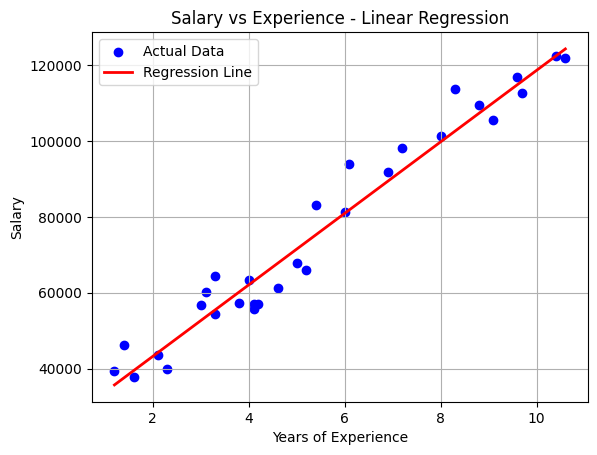

In [19]:
plt.scatter(X, y, color='blue', label ='Actual Data')
plt.plot(X, model.predict(X), color = 'red', linewidth = 2, label = 'Regression Line')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience - Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

### Day 23

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased'] # 0 or 1 classification target


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
y_pred = model.predict(x_test)

In [9]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [10]:
print(f"Accuracy: {acc:.2f}")
print("Confusion Matrix")
print(cm)

Accuracy: 0.89
Confusion Matrix
[[50  2]
 [ 7 21]]


In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt 

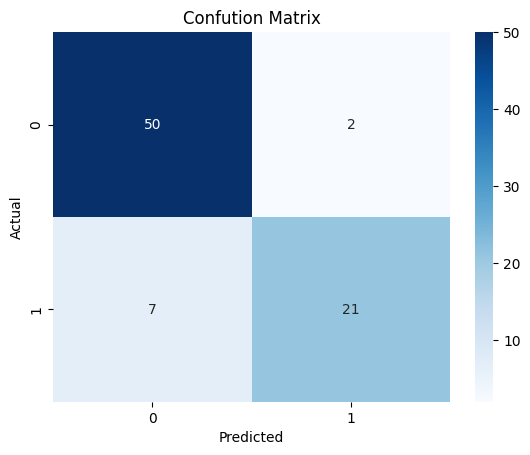

In [14]:
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title("Confution Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Day24

In [15]:
#improve model with feature scaling and feature selection
import pandas as pd
df = pd.read_csv("Social_Network_Ads.csv")
df.head()
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
# feature Scaling (Standard Scaler)
x_train, x_test, y_trai, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [22]:
# Train Improved Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [25]:
# Again Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = model.predict(x_test_scaled)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [26]:
print(f"Improved Accuracy: {acc:.2f}")
print("Improved Confusion Matrix:")
print(cm)

Improved Accuracy: 0.86
Improved Confusion Matrix:
[[49  3]
 [ 8 20]]


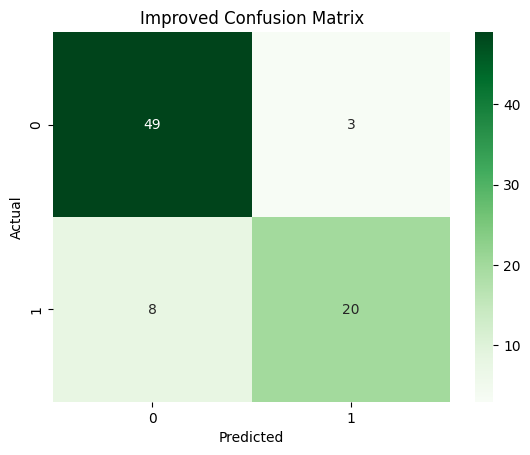

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Improved Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Accuracy drop hua: 89% ➝ 86%
# Confusion matrix bhi thoda worse hua: more false positives/negatives
# Iska matlab: Feature scaling is not always helpful, especially jab data already balanced ya linear ho ✅

Day 25 visualize your logistic model through ROC(Receiver Operating Characteristic)Curve and to find out the AUC(Area Under Curve) score

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [29]:
y_probs = model.predict_proba(x_test_scaled)[:, 1] # Instead of predict(), use predict_proba() to get probability of class 1


In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs) #fpr= false positive rate
#tpr = true positive rate 
#thresholds = classification cutoff values

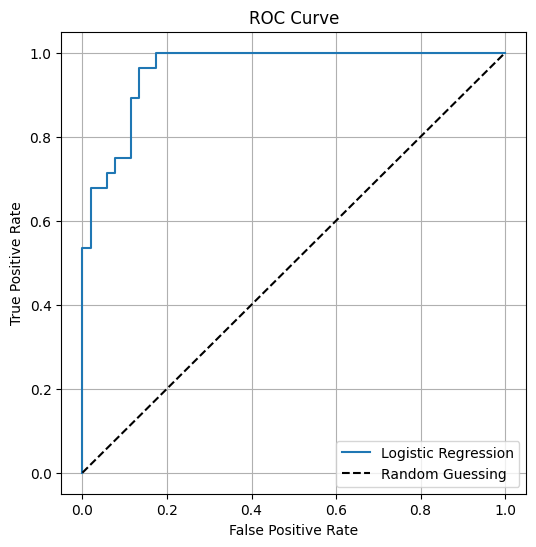

In [31]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [32]:
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc_score:.2f}")

AUC Score: 0.96
